<a href="https://www.kaggle.com/code/mmujtabah/animal-bites-analysis?scriptVersionId=184932478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-bites/Health_AnimalBites.csv


In [2]:
# Reading data from the csv file
data = pd.read_csv('/kaggle/input/animal-bites/Health_AnimalBites.csv')
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
# Checking total columns in the file
data.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [4]:
# Total number of bites by each species
animal_bites_count = data['SpeciesIDDesc'].value_counts()
animal_bites_count

SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: count, dtype: int64

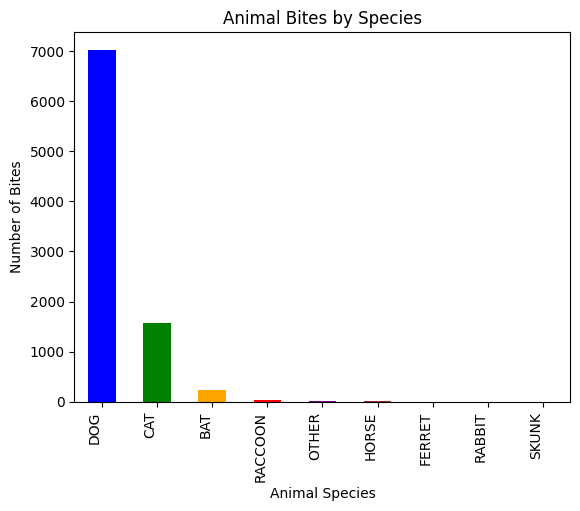

In [5]:
# Define colors for each bar
colors = [
    "blue",
    "green",
    "orange",
    "red",
    "purple",
    "brown",
    "pink",
    "cyan",
    "magenta",
]

# Plot bar chart with different colors for each bar
animal_bites_count.plot(kind="bar", color=colors)
plt.title("Animal Bites by Species")
plt.xlabel("Animal Species")
plt.ylabel("Number of Bites")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
plt.show()

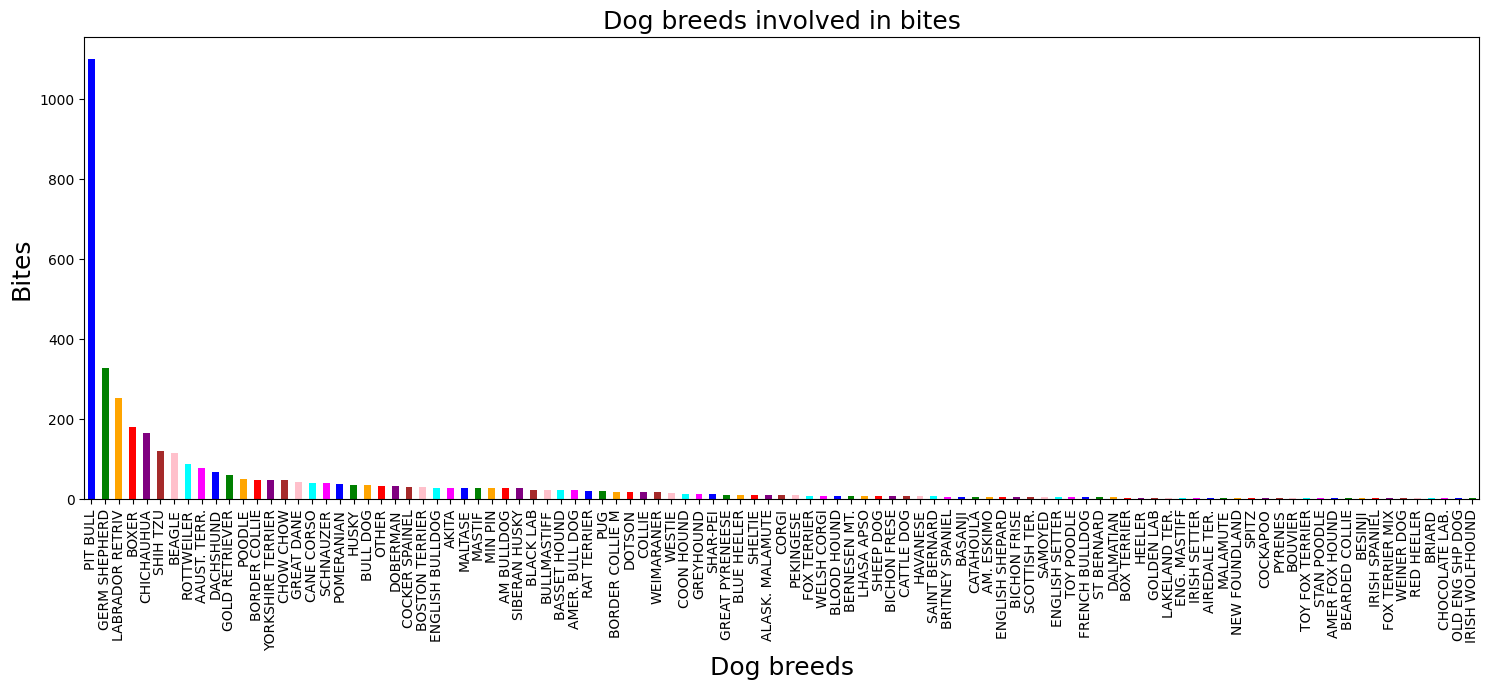

In [6]:
# Dog breeds involved in bites
dog_breeds = data[data["SpeciesIDDesc"] == "DOG"]["BreedIDDesc"].value_counts()
plt.figure(figsize=(18, 6))
dog_breeds.plot(kind="bar", color=colors)
plt.title("Dog breeds involved in bites", fontsize=18)
plt.xlabel("Dog breeds", fontsize=18)
plt.ylabel("Bites", fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [7]:
# Setting bite_date column as index column
# data.set_index("bite_date", inplace=True)
# data

In [8]:
# Fixing one abnormal value
data.loc[4490, 'bite_date'] = '2013-07-15 00:00:00'
data.bite_date[4490]

'2013-07-15 00:00:00'

In [9]:
# Convert bite_date datatype to datetime 
data['bite_date'] = pd.to_datetime(data['bite_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S', exact=False)


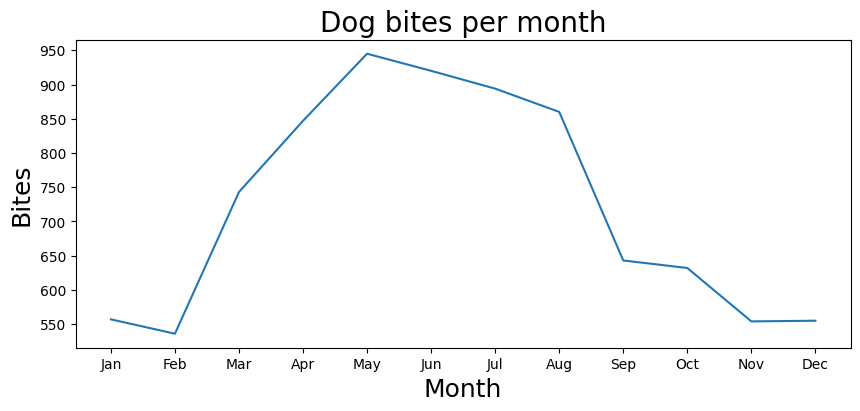

In [10]:
# Create a new column month
data['month'] = data['bite_date'].dt.month

# Group by month and count occurrences
monthly_bites = data.groupby('month').size()

plt.figure(figsize=(10, 4))
monthly_bites.plot(kind='line')
plt.title("Dog bites per month", fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Bites', fontsize=18)

# Set ticks and labels for each month
plt.xticks(monthly_bites.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.show()
